$\large\textbf{Question 1.}$

$\large\textbf{ 1.}$ Take d = 0.001 \\
\begin{equation}
A= \left( \begin{array}{ccc}
1 & -2  \\
-1 & -1 \\
0 & -1 \\
1 & 0 \\
1 & 1 \\\end{array} \right),\qquad
b = \left( \begin{array}{ccc}
7  \\
-8  \\
-4\\
6 \\
11\end{array} \right)
\end{equation}

$\large\textbf{ 2.[R]}$ What are the extreme points of this polytope. Plot the lines and use your judgement to come up
with the extreme points. Do not try to come up with an algorithm in full generalization

$\large\textbf{ 3.}$ Find a rectangle parallel to axes which perfectly covers/encloses the given polytope. Now how will you
draw points randomly from this given polytope? (Hint: rejection sampling)


In [ ]:
import pandas as pd
import numpy as np
from scipy import linalg
import math

In [ ]:
A=np.array([[1,-2],[-1,-1],[0,-1],[1,0],[1,1]])
b=np.array([7,-8,-4,6,11])

In [171]:
x=[-10,-8,-6,-4,-2,2,4,6,8,10,12,14,16,18,20]
y=[]
for i in range(A.shape[0]):

  for j in range(15):
      if A[i][1]==0:
        x1=[b[i] for k in range(15)]
      else:
        y.append(1/(A[i][1])*(b[i]-A[i][0]*x[j]))


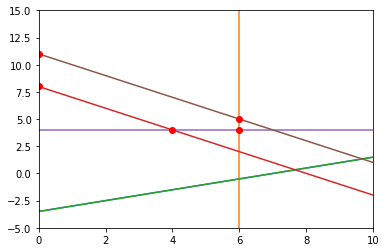


The extreme points are: (4,4) , (6,4) , (6,5) , (0,8) , (0,11)


In [172]:
import matplotlib.pyplot as plt
for i in range(5):
  if i==0:
    plt.plot(x,[y[i] for i in range(15)])
    plt.plot(x1,x)
  else:
    plt.plot(x,[y[i] for i in range(15*(i-1),15*(i))])
plt.xlim(0,10.0)
plt.ylim(-5.0,15.0)
x2=[4,6,6,0,0]
y2=[4,4,5,8,11]
plt.plot(x2,y2,'ro')
plt.show()
print('\nThe extreme points are: (4,4) , (6,4) , (6,5) , (0,8) , (0,11)')

$\large\textbf{ 4.[R]}$  Take the initial sample to be n appropriately spaced points along any edge of the described polytope. Generate n = 20 points from the polytope P = {x $\in$ $R^m$ : Ax ≤ b} such that no two points
are within distance d of each other.

In [ ]:
np.random.seed(1000)

In [173]:
x_0=[]
x_1=[]
iter=0
while len(x_0)<=20:
  x0=np.random.uniform(0,6)
  x1=np.random.uniform(4,11)
  if 1*x0-2*x1<=7 and -1*x0-1*x1<=-8 and 0*x0-1*x1<=-4 and 1*x0+0*x1<=6 and 1*x0+1*x1<=11 and abs(x0-x1)>0.001:
    x_0.append(x0)
    x_1.append(x1)
  else:
    pass 
  iter=iter+1
iter

59

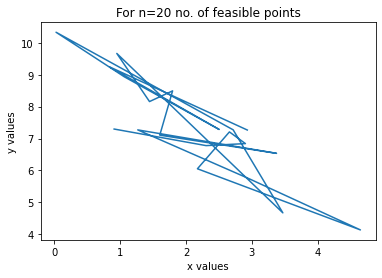

The feasible points are:
           x0         x1
0   0.907420   7.296464
1   2.304722   6.777127
2   2.901714   6.840489
3   2.658728   7.206549
4   2.172766   6.051703
5   4.648864   4.135307
6   2.966538   5.731384
7   1.265860   7.270288
8   3.348467   6.544695
9   3.374659   6.534793
10  1.600674   7.105389
11  1.795435   8.492931
12  1.444659   8.157840
13  0.947838   9.665950
14  3.470505   4.670104
15  2.715671   7.271815
16  0.024686  10.330216
17  1.061384   8.934500
18  2.502991   7.283203
19  0.836518   9.245550


In [174]:
plt.plot(x_0,x_1)
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('For n=20 no. of feasible points')
plt.show()
feasible_points=[]

for i in range(20):
  feasible_points.append((x_0[i],x_1[i]))
df=pd.DataFrame(feasible_points,columns=['x0','x1'])
print('The feasible points are:\n',df)

$\large\textbf{ 5.[R]}$ Plot the points for different values of max iterations = 30, 50, 100 ,200. Comment on the plots.


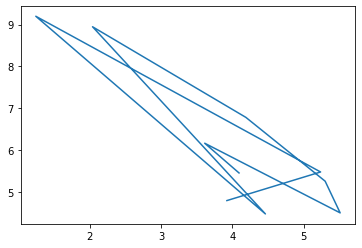

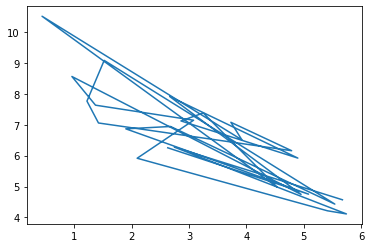

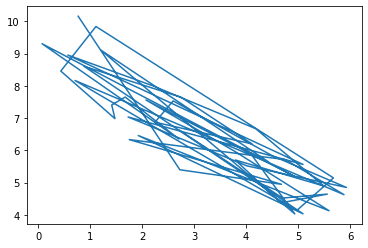

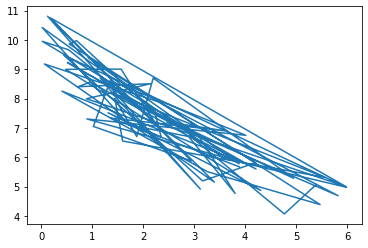

In [175]:
np.random.seed(1000)
max_iterations=[30,50,100,200]
for i in range(4):
  iter=0
  x=[]
  y=[]
  while iter<=max_iterations[i]:
    x0=np.random.uniform(0,6)
    x1=np.random.uniform(4,11)
    if 1*x0-2*x1<=7 and -1*x0-1*x1<=-8 and 0*x0-1*x1<=-4 and 1*x0+0*x1<=6 and 1*x0+1*x1<=11 and abs(x0-x1)>0.001:
      x.append(x0)
      y.append(x1)
      iter=iter+1
    else:
      iter=iter+1
  plt.plot(x,y)
  plt.show() 

$\large\textbf{ 6.[R]}$Ignore the d separation condition and use rejection sampling to draw samples from P. Estimate the area/volume of P.

In [177]:
Area=6*7
iteration=[]
for i in range(20):
  
  x1=[]
  y1=[]
  iter=0
  while len(x1)<=200:
    x=np.random.uniform(0,6)
    y=np.random.uniform(4,11)
    if 1*x-2*y<=7 and -1*x-1*y<=-8 and 0*x-1*y<=-4 and 1*x+0*y<=6 and 1*x+1*y<=11:
      x1.append(x)
      y1.append(y)
    else:
      pass 
    iter=iter+1
  iteration.append(iter)
area_P=[]
for i in range(20):
  area_P.append(200/iteration[i])
print('The  area of P  is by bounding it by rectangle whose points are((4,4) , (6,4) , (6,5) , (0,8) , (0,11)) :',np.mean(area_P)*Area)

The  area of P  is by bounding it by rectangle whose points are((4,4) , (6,4) , (6,5) , (0,8) , (0,11)) : 15.958836651346278


$\large\textbf{ 7.[R]}$Try to write a general function which will find all the extreme points for two dimensional case with inputs A $\in$ $R^{n×2}$ and b $\in$ $R^n$


In [178]:
def Extreme_point_1(A,b):
  Extreme_Points=[]
  for i in range(A.shape[0]):
    for j in range(A.shape[0]):
      if i!=j:
        B=np.array([A[i],A[j]])
        b1=np.array([b[i],b[j]])
        if np.linalg.det(B)==0:
          pass
        else:
          Extreme_Points.append(np.linalg.solve(B,b1))
      else:
        pass
    Extreme_point_1=[]
    for i in range(len(Extreme_Points)):
      t=(np.array(np.matmul(A,Extreme_Points[i]))<=np.array(b))
      #print(t)
      if False in t:
        pass
      else:
        Extreme_point_1.append(Extreme_Points[i])
    final_Extreme_point_1=np.unique(Extreme_point_1,axis=0)

  return final_Extreme_point_1
print('The extreme points of Two dimensional case are :\n',Extreme_point_1(np.array([[1,-2],[-1,-1],[0,-1],[1,0],[1,1],[0,-1],[-1,0]]),np.array([7,-8,-4,6,11,0,0])))

The extreme points of Two dimensional case are :
 [[-0.  8.]
 [ 0. 11.]
 [ 4.  4.]
 [ 6.  4.]
 [ 6.  5.]]
